# Palmer Penguins Clustering

## Dataset treatment

In [2]:
%load_ext autoreload
%autoreload 2

import json
import time
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import euclidean_distances

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Victor\Development\MESIO\ods\clustering\.venv\Lib\site-packages\palmerpenguins\penguins.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
df = load_penguins()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
df = df.dropna().reset_index(drop=True)
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [5]:
df = pd.get_dummies(df, columns=["island", "sex", "year"], drop_first=True)
# df = pd.get_dummies(df, columns=["species"])
df["species"] = df["species"].astype("category")
df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male,year_2008,year_2009
0,Adelie,39.1,18.7,181.0,3750.0,False,True,True,False,False
1,Adelie,39.5,17.4,186.0,3800.0,False,True,False,False,False
2,Adelie,40.3,18.0,195.0,3250.0,False,True,False,False,False
3,Adelie,36.7,19.3,193.0,3450.0,False,True,False,False,False
4,Adelie,39.3,20.6,190.0,3650.0,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
328,Chinstrap,55.8,19.8,207.0,4000.0,True,False,True,False,True
329,Chinstrap,43.5,18.1,202.0,3400.0,True,False,False,False,True
330,Chinstrap,49.6,18.2,193.0,3775.0,True,False,True,False,True
331,Chinstrap,50.8,19.0,210.0,4100.0,True,False,True,False,True


In [6]:
X = df.drop("species", axis=1)
y = df["species"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_standardized = pd.DataFrame(X_scaled, columns=X.columns)

df_standardized

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male,year_2008,year_2009
0,-0.896042,0.780732,-1.426752,-0.568475,-0.765320,2.466801,0.991031,-0.716684,-0.735980
1,-0.822788,0.119584,-1.069474,-0.506286,-0.765320,2.466801,-1.009050,-0.716684,-0.735980
2,-0.676280,0.424729,-0.426373,-1.190361,-0.765320,2.466801,-1.009050,-0.716684,-0.735980
3,-1.335566,1.085877,-0.569284,-0.941606,-0.765320,2.466801,-1.009050,-0.716684,-0.735980
4,-0.859415,1.747026,-0.783651,-0.692852,-0.765320,2.466801,0.991031,-0.716684,-0.735980
...,...,...,...,...,...,...,...,...,...
328,2.162314,1.340165,0.431094,-0.257532,1.306643,-0.405383,0.991031,-0.716684,1.358732
329,-0.090248,0.475587,0.073816,-1.003795,1.306643,-0.405383,-1.009050,-0.716684,1.358732
330,1.026876,0.526444,-0.569284,-0.537380,1.306643,-0.405383,0.991031,-0.716684,1.358732
331,1.246638,0.933305,0.645461,-0.133155,1.306643,-0.405383,0.991031,-0.716684,1.358732


### Correlation

<Axes: >

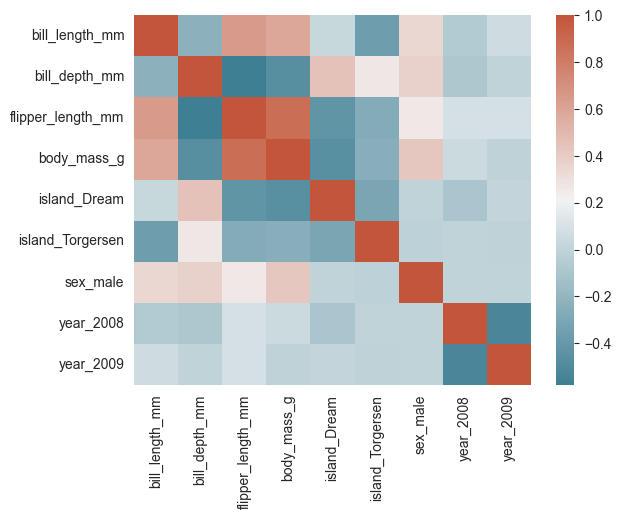

In [7]:
sns.heatmap(df_standardized.corr(), cmap=sns.diverging_palette(220, 20, as_cmap=True))

### Feature importance

In [8]:
f_values, p_values = f_classif(df_standardized, y)

anova_results = pd.DataFrame({"Feature": X.columns, "F-Value": f_values, "P-Value": p_values}).sort_values(
    by="F-Value", ascending=False
)

print(anova_results)

             Feature     F-Value        P-Value
2  flipper_length_mm  567.406992  1.587418e-107
0     bill_length_mm  397.299437   1.380984e-88
1      bill_depth_mm  344.825082   1.446616e-81
3        body_mass_g  341.894895   3.744505e-81
4       island_Dream  208.347193   3.063542e-59
5   island_Torgersen   43.988989   1.160083e-17
7          year_2008    1.245831   2.890514e-01
6           sex_male    0.024088   9.762014e-01
8          year_2009    0.019740   9.804544e-01


### Distance scaling according to feature importance

In [9]:
df_scaled = df_standardized.copy()
df_scaled["flipper_length_mm"] = df_scaled["flipper_length_mm"] * 3
df_scaled["bill_length_mm"] = df_scaled["bill_length_mm"] * 2
df_scaled["bill_depth_mm"] = df_scaled["bill_depth_mm"] * 1.75
df_scaled["body_mass_g"] = df_scaled["body_mass_g"] * 1.75

## Clustering

In [10]:
from kmeans import apply_kmeans
from kmedoid import apply_kmedoids
from mst import run_mst_clustering, run_mst_clustering_heuristic
from ampl.ampl import compute_distance_matrix, write_ampl_dat, run_ampl_and_get_assignments
from utils import penguin_generator, show_confusion_matrix, scatter_comparison, align_with_species
from sklearn.metrics import confusion_matrix

### KMeans

In [11]:
df["Cluster KMeans"] = apply_kmeans(df_standardized[anova_results["Feature"][:6]], 3)
df["Cluster KMeans Scaled"] = apply_kmeans(df_scaled[anova_results["Feature"][:6]], 3)
df["Cluster KMeans BiVariate"] = apply_kmeans(df_standardized[anova_results["Feature"][:2]], 3)
align_with_species(df, ["Cluster KMeans", "Cluster KMeans Scaled", "Cluster KMeans BiVariate"])

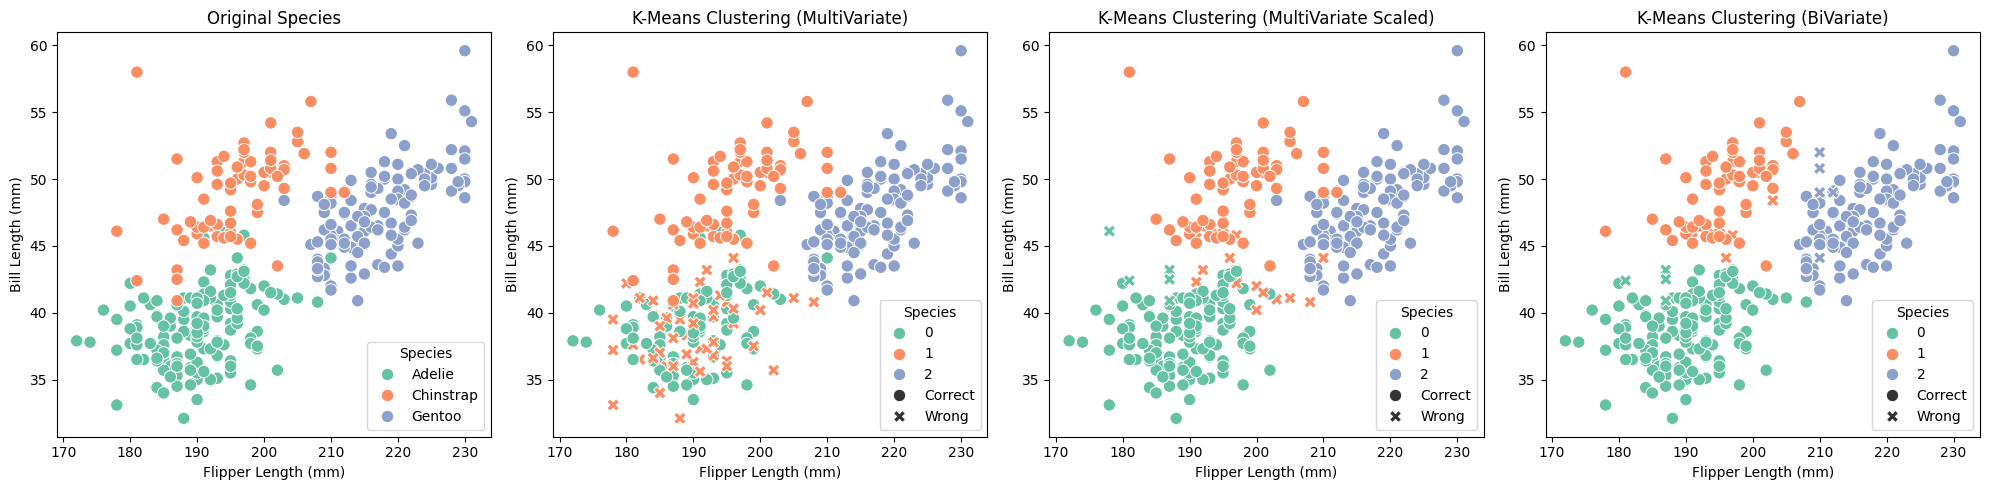

In [12]:
fig = scatter_comparison(
    df, "species", "Cluster KMeans", "Cluster KMeans Scaled", "Cluster KMeans BiVariate", "K-Means"
)
plt.tight_layout()
fig.savefig("images/kmeans_clustering.png", dpi=600)

#### Evaluation

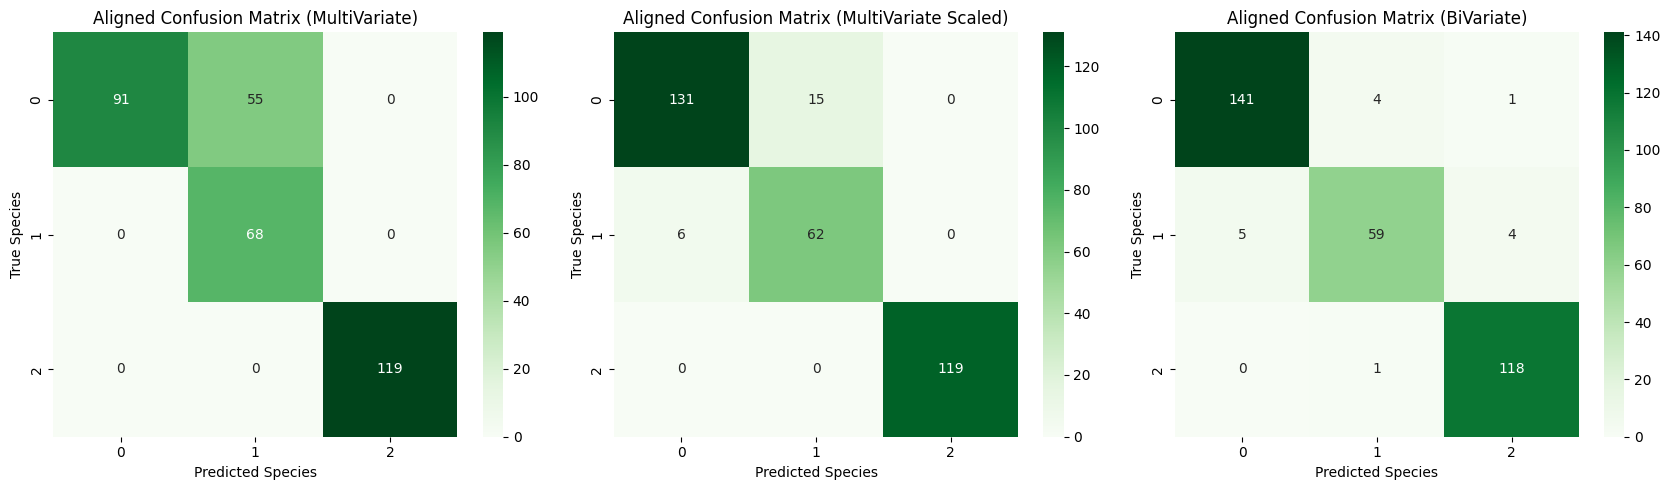

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMeans"]),
    "Aligned Confusion Matrix (MultiVariate)",
    ax=ax[0],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMeans Scaled"]),
    "Aligned Confusion Matrix (MultiVariate Scaled)",
    ax=ax[1],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMeans BiVariate"]),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[2],
)
plt.tight_layout()
fig.savefig("images/kmeans_confusion.png", dpi=600)

### KMedoids

In [14]:
df["Cluster KMedoids"] = apply_kmedoids(df_standardized[anova_results["Feature"][:6]], 3)
df["Cluster KMedoids Scaled"] = apply_kmedoids(df_scaled[anova_results["Feature"][:6]], 3)
df["Cluster KMedoids BiVariate"] = apply_kmedoids(df_standardized[anova_results["Feature"][:2]], 3)
align_with_species(df, ["Cluster KMedoids", "Cluster KMedoids Scaled", "Cluster KMedoids BiVariate"])

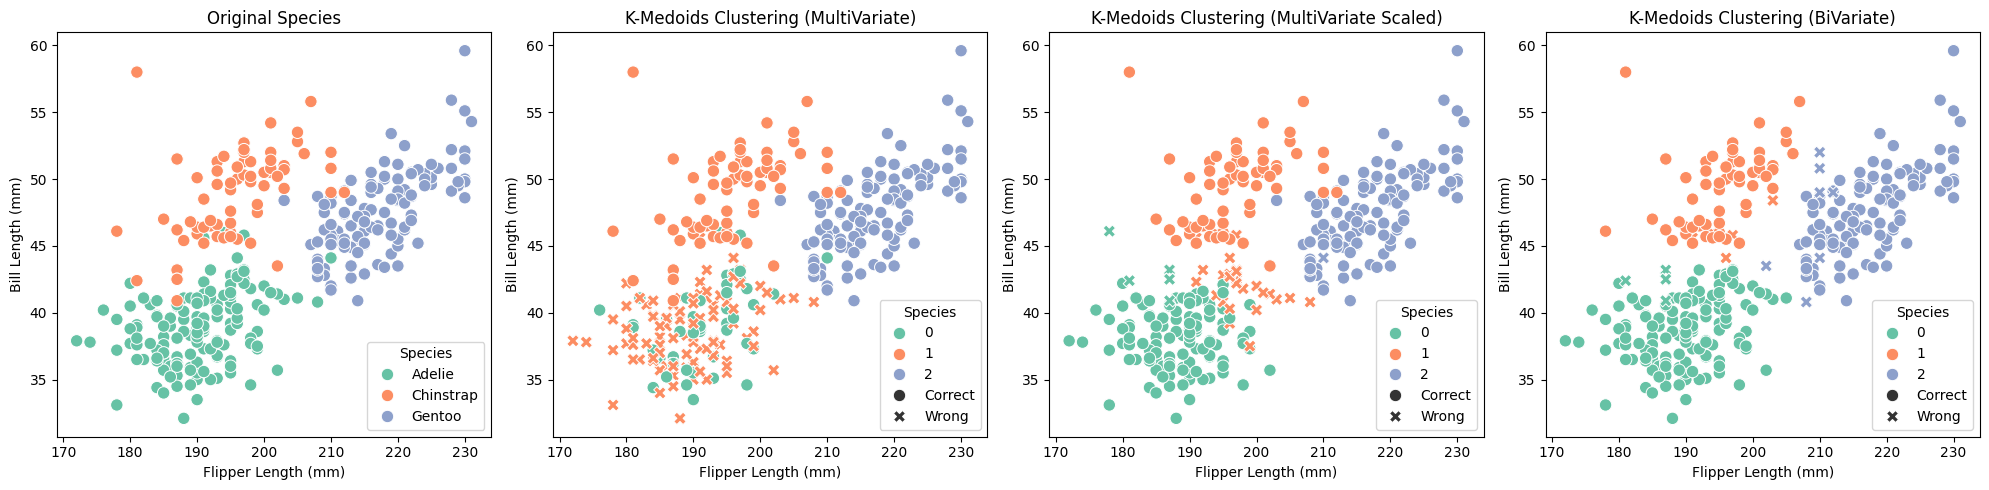

In [15]:
fig = scatter_comparison(
    df, "species", "Cluster KMedoids", "Cluster KMedoids Scaled", "Cluster KMedoids BiVariate", "K-Medoids"
)
plt.tight_layout()
fig.savefig("images/kmedoids_clustering.png", dpi=600)

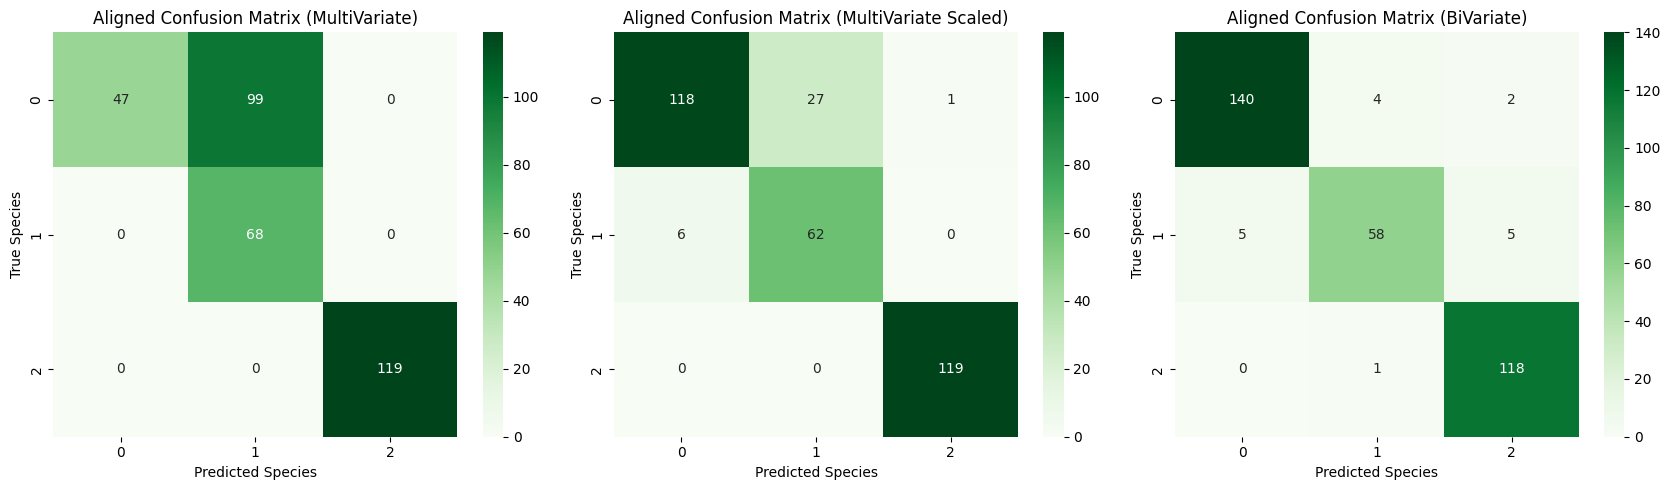

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMedoids"]),
    "Aligned Confusion Matrix (MultiVariate)",
    ax=ax[0],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMedoids Scaled"]),
    "Aligned Confusion Matrix (MultiVariate Scaled)",
    ax=ax[1],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster KMedoids BiVariate"]),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[2],
)
plt.tight_layout()
fig.savefig("images/kmedoids_confusion.png", dpi=600)

### MST

In [11]:
df["Cluster MST"] = run_mst_clustering(df_standardized[anova_results["Feature"][:6]], cutoff=2)
df["Cluster MST Scaled"] = run_mst_clustering(df_scaled[anova_results["Feature"][:6]], cutoff=2)
df["Cluster MST BiVariate"] = run_mst_clustering(df_standardized[anova_results["Feature"][:2]], cutoff=2)
align_with_species(df, ["Cluster MST", "Cluster MST Scaled", "Cluster MST BiVariate"])

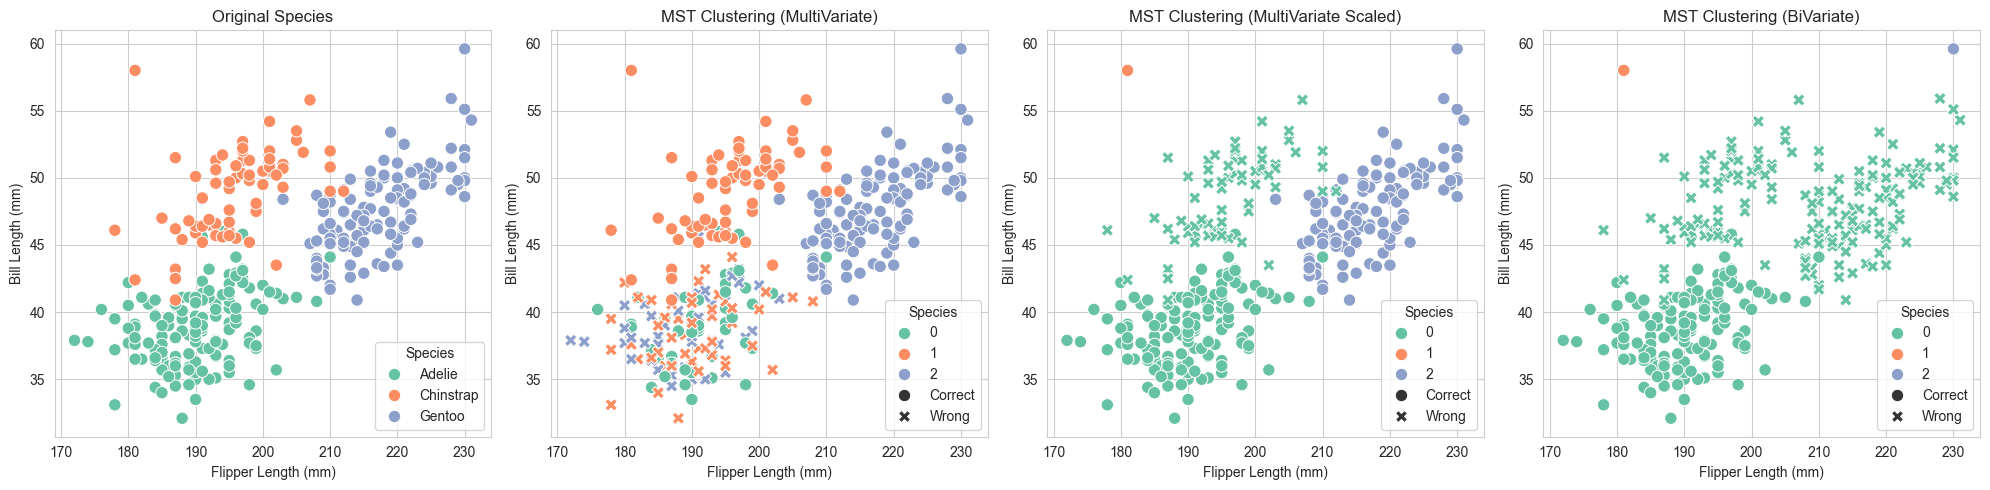

In [19]:
fig = scatter_comparison(df, "species", "Cluster MST", "Cluster MST Scaled", "Cluster MST BiVariate", "MST")
plt.tight_layout()
fig.savefig("images/mst_clustering.png", dpi=600)

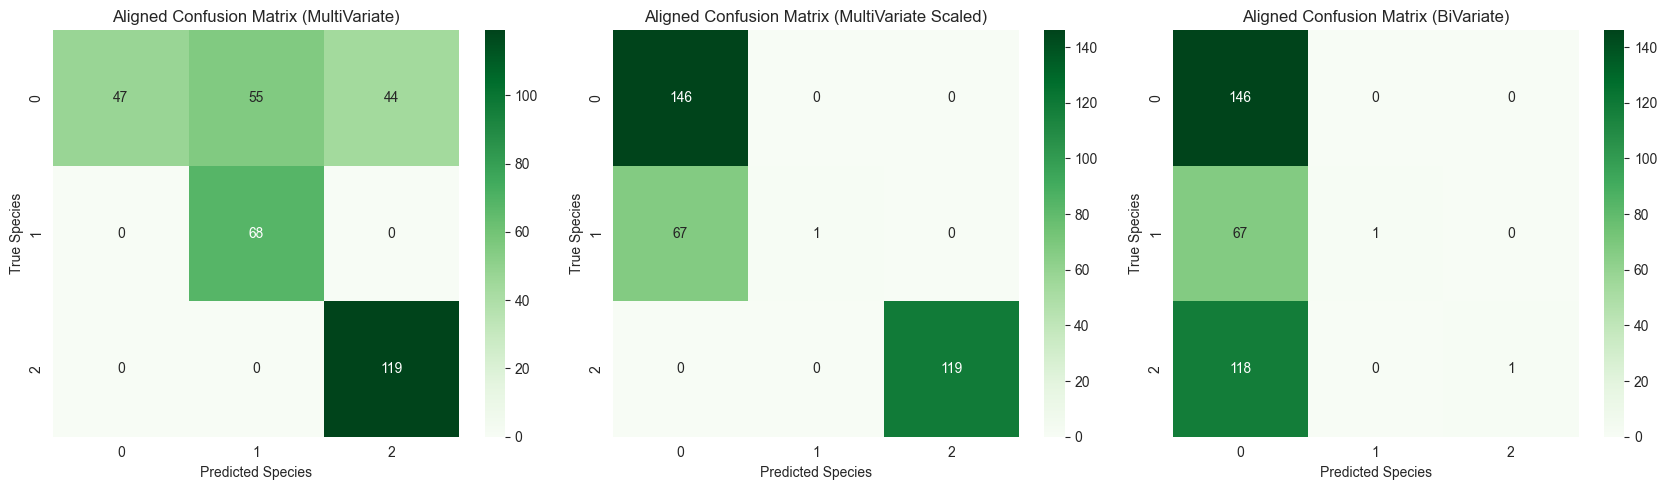

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster MST"]),
    "Aligned Confusion Matrix (MultiVariate)",
    ax=ax[0],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster MST Scaled"]),
    "Aligned Confusion Matrix (MultiVariate Scaled)",
    ax=ax[1],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster MST BiVariate"]),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[2],
)
plt.tight_layout()
fig.savefig("images/mst_confusion.png", dpi=600)

### MST Heuristic

In [14]:
df["Cluster MST-H"] = run_mst_clustering_heuristic(df_standardized[anova_results["Feature"][:6]], cutoff=2)
df["Cluster MST-H Scaled"] = run_mst_clustering_heuristic(df_scaled[anova_results["Feature"][:6]], cutoff=2)
df["Cluster MST-H BiVariate"] = run_mst_clustering_heuristic(df_standardized[anova_results["Feature"][:2]], cutoff=2)
align_with_species(df, ["Cluster MST-H", "Cluster MST-H", "Cluster MST-H BiVariate"])

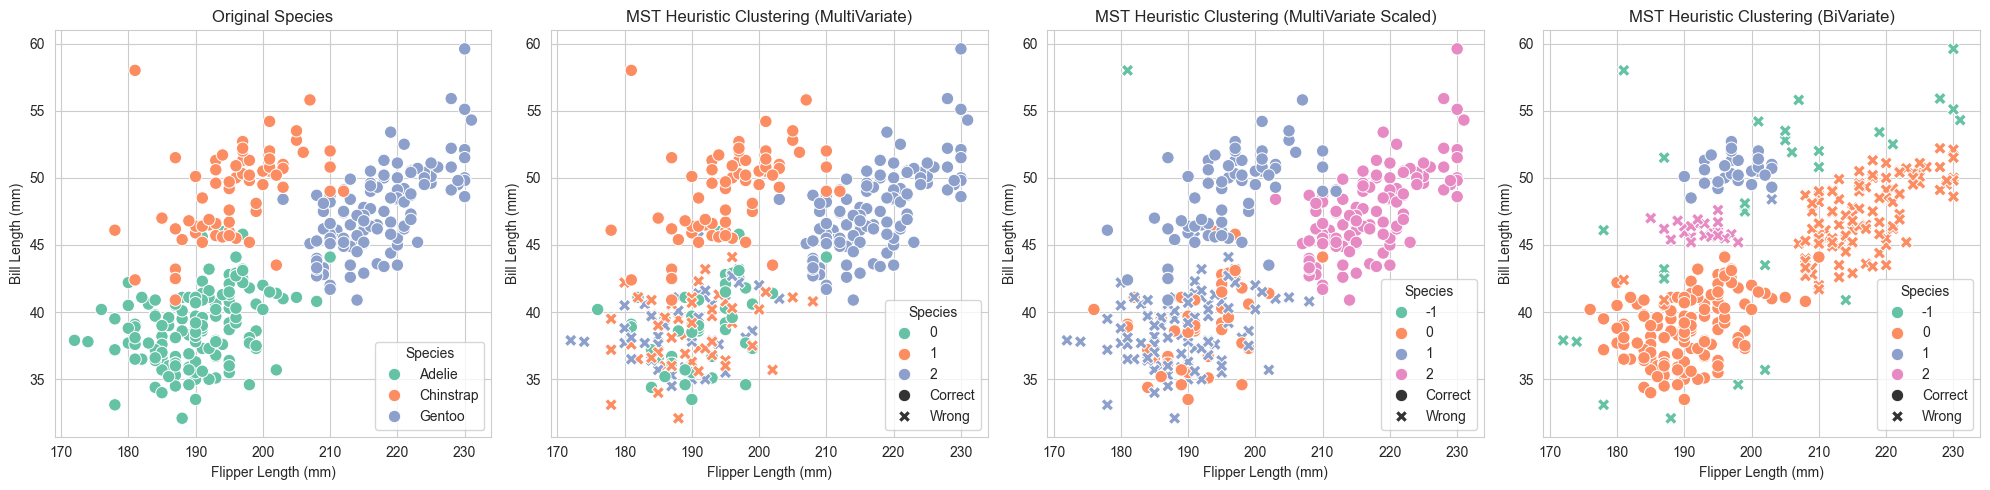

In [17]:
fig = scatter_comparison(df, "species", "Cluster MST-H", "Cluster MST-H Scaled", "Cluster MST-H BiVariate", "MST Heuristic")
plt.tight_layout()
fig.savefig("images/msth_clustering.png", dpi=600)

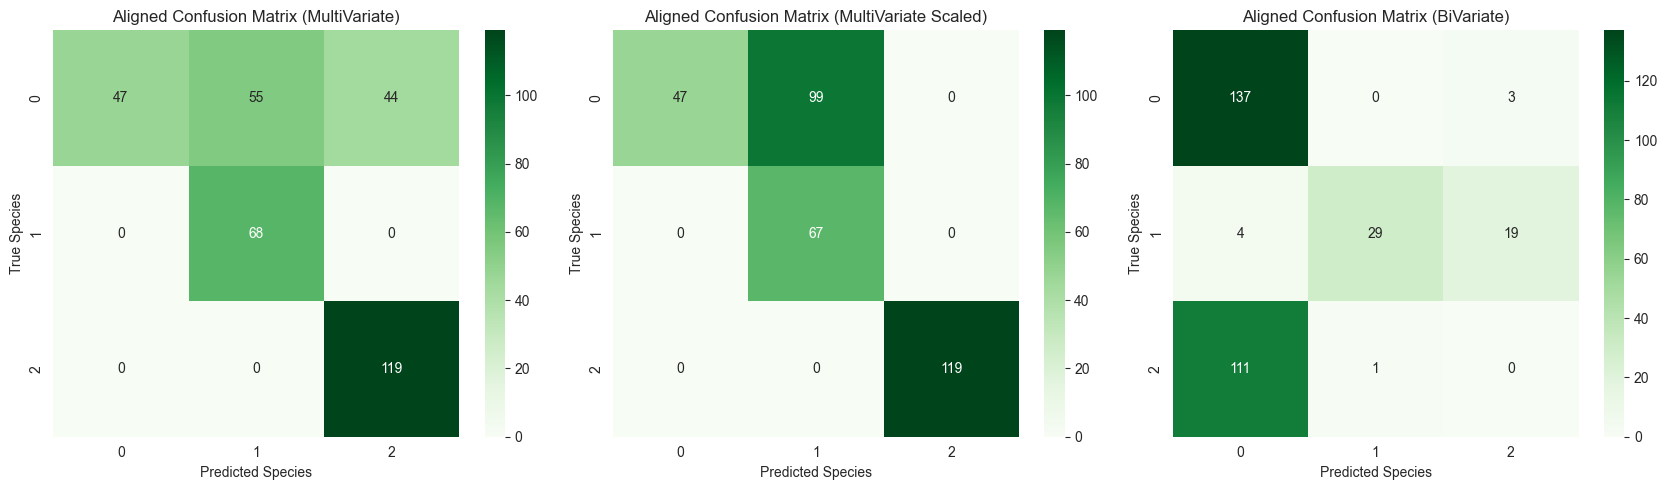

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster MST-H"]),
    "Aligned Confusion Matrix (MultiVariate)",
    ax=ax[0],
)
outlier_filter = df["Cluster MST-H Scaled"] != -1
show_confusion_matrix(
    confusion_matrix(df[outlier_filter]["species"].cat.codes, df[outlier_filter]["Cluster MST-H Scaled"]),
    "Aligned Confusion Matrix (MultiVariate Scaled)",
    ax=ax[1],
)
outlier_filter = df["Cluster MST-H BiVariate"] != -1
show_confusion_matrix(
    confusion_matrix(df[outlier_filter]["species"].cat.codes, df[outlier_filter]["Cluster MST-H BiVariate"]),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[2],
)
plt.tight_layout()
fig.savefig("images/msth_confusion.png", dpi=600)

### KMedoids AMPL

In [23]:
np_full = compute_distance_matrix(df_standardized[anova_results["Feature"][:6]])
np_scaled = compute_distance_matrix(df_scaled[anova_results["Feature"][:6]])
np_bivariate = compute_distance_matrix(df_standardized[anova_results["Feature"][:2]])

In [24]:
np_full = euclidean_distances(df_standardized[anova_results["Feature"][:6]])
np_scaled = euclidean_distances(df_scaled[anova_results["Feature"][:6]])
np_bivariate = euclidean_distances(df_standardized[anova_results["Feature"][:2]])

In [25]:
write_ampl_dat(np_full, 3)
df_full = run_ampl_and_get_assignments()
print("Full Done")
write_ampl_dat(np_scaled, 3)
df_scaled = run_ampl_and_get_assignments()
print("Scaled Done")
write_ampl_dat(np_bivariate, 3)
df_bivariate = run_ampl_and_get_assignments()
print("BiVariate Done")

CPLEX 22.1.1CPLEX 22.1.1: optimal solution; objective 457.3615
12 simplex iterations
Full Done
CPLEX 22.1.1CPLEX 22.1.1: optimal solution; objective 826.0281
50 simplex iterations
Scaled Done
CPLEX 22.1.1CPLEX 22.1.1: optimal solution; objective 200.024
19 simplex iterations
BiVariate Done


In [26]:
df["Cluster AMPL"], _ = pd.factorize(df_full["AMPL"])
df["Cluster AMPL Scaled"], _ = pd.factorize(df_scaled["AMPL"])
df["Cluster AMPL BiVariate"], _ = pd.factorize(df_bivariate["AMPL"])

align_with_species(df, ["Cluster AMPL", "Cluster AMPL Scaled", "Cluster AMPL BiVariate"])

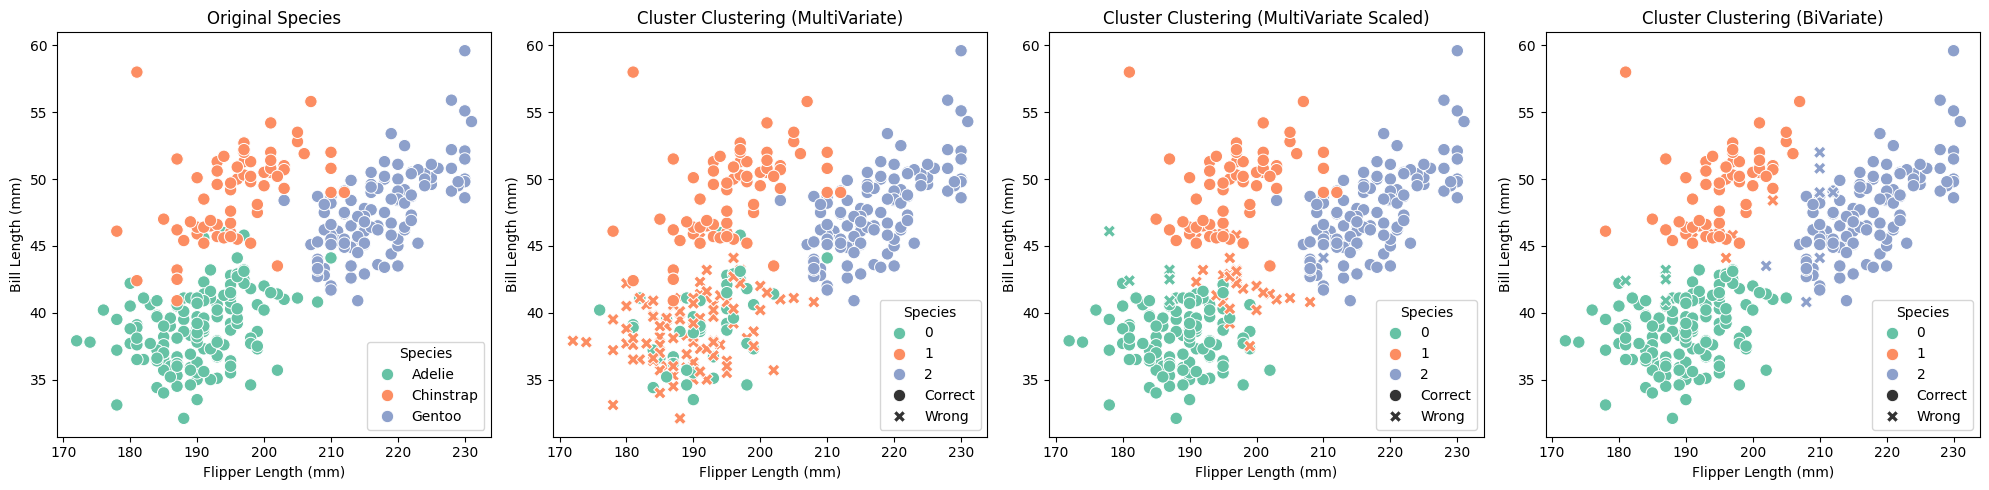

In [27]:
fig = scatter_comparison(df, "species", "Cluster AMPL", "Cluster AMPL Scaled", "Cluster AMPL BiVariate", "Cluster")
plt.tight_layout()
fig.savefig("images/ampl_clustering.png", dpi=600)

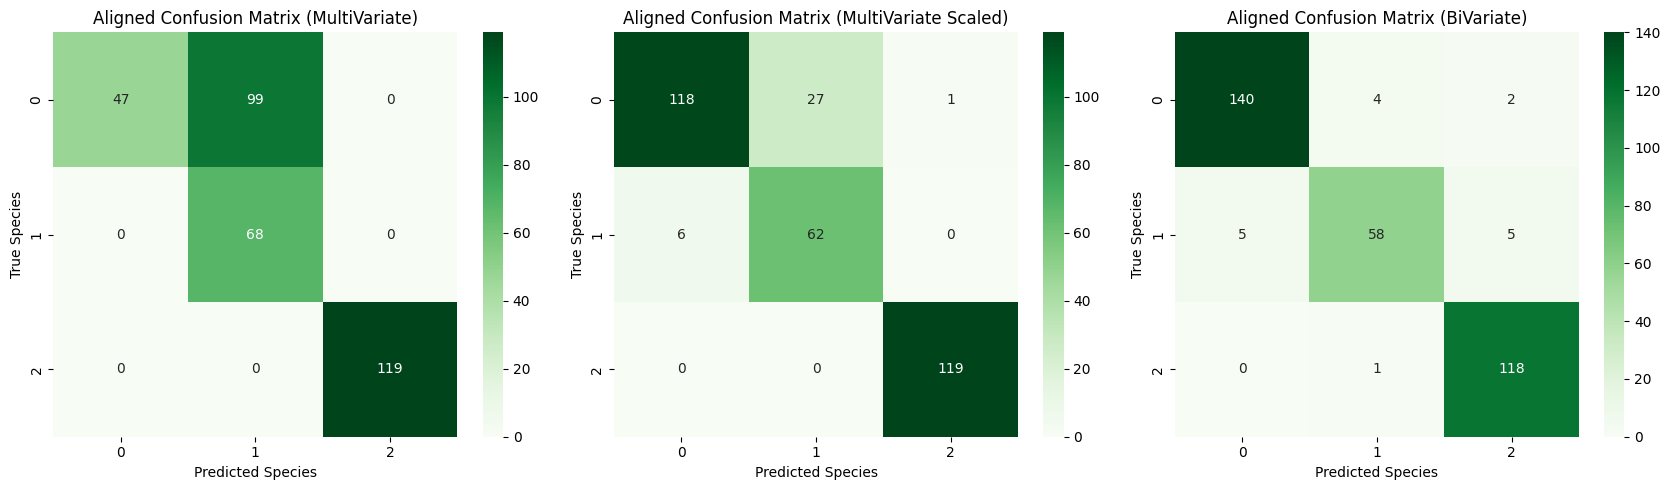

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster AMPL"]),
    "Aligned Confusion Matrix (MultiVariate)",
    ax=ax[0],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster AMPL Scaled"]),
    "Aligned Confusion Matrix (MultiVariate Scaled)",
    ax=ax[1],
)
show_confusion_matrix(
    confusion_matrix(df["species"].cat.codes, df["Cluster AMPL BiVariate"]),
    "Aligned Confusion Matrix (BiVariate)",
    ax=ax[2],
)
plt.tight_layout()
fig.savefig("images/ampl_confusion.png", dpi=600)

#### Time analysis

In [29]:
penguin_generator(df, 100000)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_male,year_2008,year_2009,...,Cluster KMedoids BiVariate,Cluster MST,Cluster MST Scaled,Cluster MST BiVariate,Cluster MST-H,Cluster MST-H Scaled,Cluster MST-H BiVariate,Cluster AMPL,Cluster AMPL Scaled,Cluster AMPL BiVariate
0,Adelie,35.436622,17.293904,181.485560,3517.278398,False,False,False,False,False,...,0.156219,0.144776,1.958103,-1.348742e-08,0.663445,1.796096,-1.173271,0.857462,0.151579,0.022342
1,Adelie,41.997255,16.982004,193.702534,4505.193604,False,True,False,False,False,...,-0.022540,1.920287,1.091850,-5.044960e-09,1.433883,1.414928,0.001419,0.979764,-0.092595,-0.143470
2,Adelie,33.105033,18.738863,202.552428,4453.251525,True,False,True,True,True,...,0.099500,1.139942,1.290174,5.573176e-09,1.013893,1.500218,-0.370475,0.879902,-0.246299,0.011384
3,Adelie,37.195869,17.309483,195.999313,4344.062833,False,True,False,True,True,...,0.015548,0.600957,1.223042,-8.380488e-09,0.920996,1.715267,0.033254,1.289530,1.064460,0.011766
4,Adelie,38.285634,17.098455,195.725365,3685.178784,False,True,True,False,False,...,0.046398,1.835874,0.109538,-5.097256e-09,-0.196437,2.226719,-0.031344,1.332806,-0.215210,0.027848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Chinstrap,51.696237,19.743954,207.417598,4166.987355,True,False,False,True,False,...,0.920620,1.000000,1.000000,5.202880e-03,1.000000,2.000000,-1.492499,1.000000,0.966441,1.038040
2996,Chinstrap,47.178726,19.612986,187.446828,3305.452978,True,False,False,False,False,...,0.784421,1.000000,1.000000,-3.718422e-02,1.000000,2.000000,2.254600,1.000000,0.924726,0.850955
2997,Chinstrap,50.479690,17.071267,202.401574,3938.600336,True,False,True,False,True,...,0.857072,1.000000,1.000000,5.557149e-03,1.000000,2.000000,-1.557176,1.000000,1.059672,1.048294
2998,Chinstrap,50.963851,18.261709,205.865869,4366.196124,True,False,True,True,True,...,1.028385,1.000000,1.000000,3.642244e-02,1.000000,2.000000,0.194486,1.000000,0.847137,2.047889


In [24]:
fake_df = penguin_generator(df, 1_000_0000)

In [ ]:
fakeX = fake_df.drop("species", axis=1)
fakeY = fake_df["species"].copy()
fake_scaler = StandardScaler()
fake_scaled = pd.DataFrame(fake_scaler.fit_transform(fakeX), columns=fakeX.columns)
apply_kmedoids(fake_scaled, 3)

In [41]:
sizes = [90, 180, 300]

In [ ]:
with open("ampl_times.json", "r", encoding="utf8") as f:
    all_series = json.load(f)

all_series.append({})
series_idx = len(all_series) - 1

for size in sizes:
    fake_penguins = penguin_generator(original_penguins=df, penguins_per_species=size // 3)
    X = fake_penguins.drop("species", axis=1)
    y = fake_penguins["species"].copy()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    fake_penguins_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    fake_distances = euclidean_distances(fake_penguins_scaled[anova_results["Feature"][:6]])

    write_ampl_dat(fake_distances, 3)
    start = time.time()
    fake_clusters = run_ampl_and_get_assignments()
    end = time.time()

    all_series[series_idx][str(size)] = end - start

    with open("ampl_times.json", "w", encoding="utf8") as f:
        json.dump(all_series, f, indent=2)

CPLEX 22.1.1CPLEX 22.1.1: optimal solution; objective 128.6823
1869 simplex iterations
CPLEX 22.1.1CPLEX 22.1.1: optimal solution; objective 252.8325
6661 simplex iterations
CPLEX 22.1.1CPLEX 22.1.1: optimal solution; objective 445.2778
19 simplex iterations


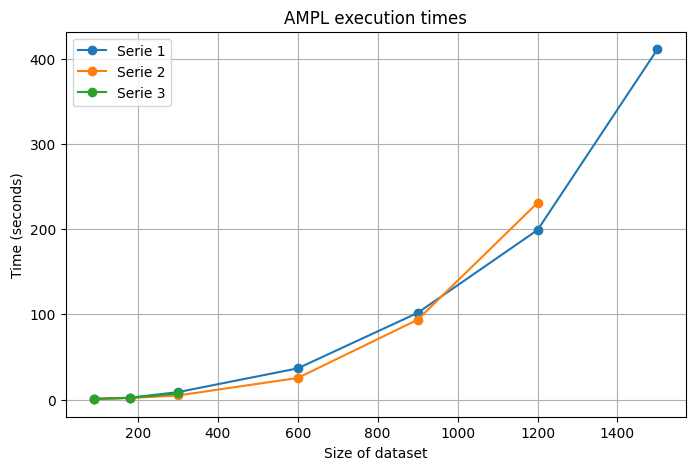

In [45]:
filename = "ampl_times.json"

with open(filename, "r", encoding="utf8") as f:
    data_list = json.load(f)

data_list = [{int(k): v for k, v in d.items()} for d in data_list]

plt.figure(figsize=(8, 5))
for i, data in enumerate(data_list):
    x = sorted(data.keys())
    y = [data[k] for k in x]
    plt.plot(x, y, marker="o", label=f"Serie {i + 1}")

plt.xlabel("Size of dataset")
plt.ylabel("Time (seconds)")
plt.title("AMPL execution times")
plt.legend()
plt.grid(True)
plt.show()

## Comparison